In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sympy import Matrix,Rational

$$
\boxed{\Phi _{km}^{z\rho } \ =\int _{0}^{1} \varphi _{zk} \varphi _{\rho m} \ d\tau \ =\ \frac{4}{\pi }\left[ \delta _{k >0} \delta _{( k+m)\bmod 2=1}\frac{2m}{\left( m^{2} -k^{2}\right)} +\delta _{k=0} \delta _{m\bmod 2=1}\frac{1}{m}\right]}
$$

In [9]:
def item_Phi_zrho_km(k,m):
    if k>0 and (k+m)%2==1:
        return Rational(2*m,m*m-k*k).evalf()
    elif k==0 and m%2==1:
        return Rational(1,m).evalf()
    else:
        return 0

In [10]:
Phi_zrho_km_sym = Matrix(2000,2000,item_Phi_zrho_km)[:,1:]

In [145]:
Phi_zrho_km = np.array(Phi_zrho_km_sym, dtype=float)

In [7]:
np.save('Phi_zrho_km.npy', Phi_zrho_km*4/np.pi)

In [2]:
Phi_zrho_km = np.load('Phi_zrho_km.npy')

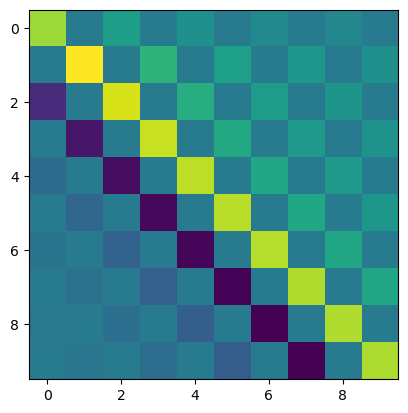

In [59]:
plt.imshow(Phi_zrho_km[:10,:10])

$$
\boxed{\Phi _{kmn}^{\mathcal{P}} \ =\frac{8}{\pi } \delta _{( k+m+n)\bmod 2=1}\frac{4knm}{(k+m+n)(-k+m+n)(k-m+n)(k+m-n)}}
$$

In [41]:
K_matr = np.arange(1,200,  dtype=np.float128).reshape(-1,1,1)
M_matr = np.arange(1,200,  dtype=np.float128).reshape(1,-1,1)
N_matr = np.arange(1,1000, dtype=np.float128).reshape(1,1,-1)
Phi_Rho = 4*K_matr*M_matr*N_matr
Phi_Rho /= (K_matr+M_matr+N_matr)*(-K_matr+M_matr+N_matr)*\
            (K_matr-M_matr+N_matr)*(K_matr+M_matr-N_matr)

/tmp/ipykernel_53473/1296196002.py:5: RuntimeWarning: divide by zero encountered in divide
  Phi_Rho /= (K_matr+M_matr+N_matr)*(-K_matr+M_matr+N_matr)*\


In [42]:
Phi_Rho[(K_matr+M_matr+N_matr) %2==0]=0

<IPython.core.display.Javascript object>


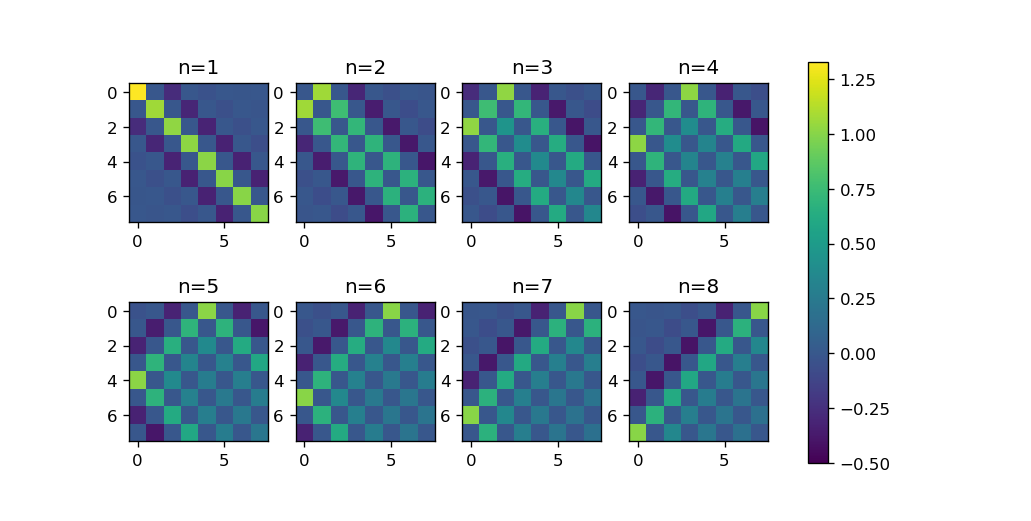

/tmp/ipykernel_53473/380141442.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


In [50]:
%matplotlib notebook

from matplotlib.colors import Normalize
import matplotlib.cm as cm

fig,axs = plt.subplots(2,4)


cmap = cm.get_cmap('viridis')
normalizer = Normalize(-0.5, 1.33)
im = cm.ScalarMappable(norm=normalizer)


for i in range(2):
    for j in range(4):
        n = 4*i+j
        axs[i,j].imshow(Phi_Rho[:8,:8,n],cmap=cmap, norm=normalizer)
        axs[i,j].set_title(f'n={n+1}')

fig.colorbar(im, ax=axs.ravel().tolist())


In [47]:
Phi_Rho[1,2,3],Phi_Rho[2,3,1],Phi_Rho[3,2,1]

(0.7111111111111111111, 0.7111111111111111111, 0.7111111111111111111)

In [71]:
np.save('Phi_Rho.npy', Phi_Rho*8/np.pi)

$$
\boxed{ \begin{array}{{>{\displaystyle}l}}
\Phi _{km|n}^{zz|\rho } =\int \varphi _{zk} \varphi _{zm} \varphi _{\rho n} d\tau \\
\Phi _{km >0|n}^{zz|\rho } =\frac{8}{\pi } \delta _{( k+m+n)\bmod 2=1}\left[\frac{2\left( k^{2} +m^{2} -n^{2}\right) n}{(k+m+n)(-k+m+n)(k-m+n)(k+m-n)}\right]\\
\Phi _{k|m=0|n}^{zz|\rho } =\Phi _{kn}^{z\rho }
\end{array}}
$$

In [3]:
K_matr = np.arange(0,900,  dtype=np.float128).reshape(-1,1,1)
M_matr = np.arange(0,200,  dtype=np.float128).reshape(1,-1,1)
N_matr = np.arange(1,1000, dtype=np.float128).reshape(1,1,-1)

In [4]:
Phi_zzrho = 2*(K_matr**2+M_matr**2-N_matr**2)*N_matr

In [5]:
Phi_zzrho /= (K_matr+M_matr+N_matr)*(-K_matr+M_matr+N_matr)*\
            (K_matr-M_matr+N_matr)*(K_matr+M_matr-N_matr)

/tmp/ipykernel_14477/2754422355.py:1: RuntimeWarning: divide by zero encountered in divide
  Phi_zzrho /= (K_matr+M_matr+N_matr)*(-K_matr+M_matr+N_matr)*\
/tmp/ipykernel_14477/2754422355.py:1: RuntimeWarning: invalid value encountered in divide
  Phi_zzrho /= (K_matr+M_matr+N_matr)*(-K_matr+M_matr+N_matr)*\


In [6]:
Phi_zzrho[(K_matr+M_matr+N_matr) %2==0]=0

In [7]:
Phi_zzrho *=8/np.pi

In [8]:
Phi_zzrho[0,:,:]=None
Phi_zzrho[:,0,:]=None

In [12]:
Phi_zzrho[:,0,:] = Phi_zrho_km[:900,:1000-1]
Phi_zzrho[0,:,:] = Phi_zrho_km[:200,:1000-1]

<IPython.core.display.Javascript object>


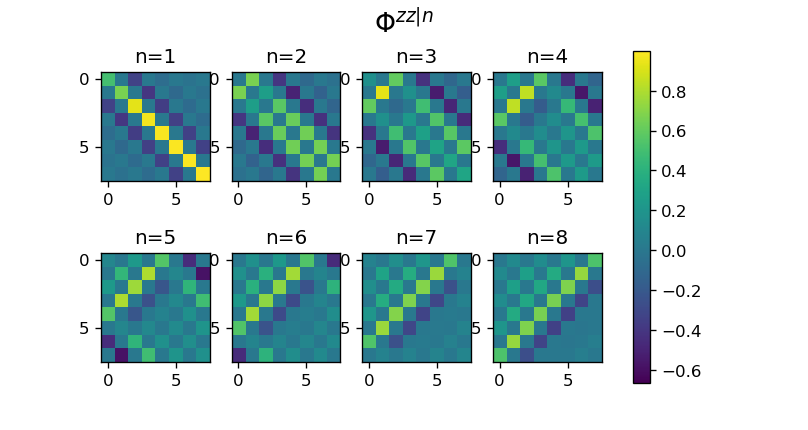

/tmp/ipykernel_53473/1203597713.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


In [70]:
%matplotlib notebook

from matplotlib.colors import Normalize
import matplotlib.cm as cm

fig,axs = plt.subplots(2,4)

fig.suptitle(r'$\Phi^{zz|n}$', fontsize=16)
cmap = cm.get_cmap('viridis')
normalizer = Normalize(np.min(np.pi/8*Phi_zzrho), np.max(np.pi/8*Phi_zzrho))
im = cm.ScalarMappable(norm=normalizer)


for i in range(2):
    for j in range(4):
        n = 4*i+j
        axs[i,j].imshow(np.pi/8*Phi_zzrho[:8,:8,n],cmap=cmap, norm=normalizer)
        axs[i,j].set_title(f'n={n+1}')

fig.colorbar(im, ax=axs.ravel().tolist())


In [14]:
np.save('Phi_zzrho.npy', Phi_zzrho)

In [2]:
Phi_Rho = np.load('Phi_Rho.npy')
Phi_zzrho = np.load('Phi_zzrho.npy')

In [4]:
Phi_Rho.shape

(199, 199, 999)

In [5]:
Phi_zzrho.shape

(900, 200, 999)

In [13]:
Phi_zrho_km.shape

(2000, 1999)

In [4]:
Phi_sin = np.zeros((2000-1,2000-1))
for k in range(Phi_sin.shape[0]):
    Phi_sin[k,:]=Phi_zrho_km[:k+1,:2000-1].sum(axis=0)

In [8]:
K_index = np.arange(1,2000).reshape(-1,1)
M_index = np.arange(1,2000).reshape(1,-1)

In [9]:
Phi_sin[(K_index+M_index) % 2==1]=0

In [10]:
Phi_sin*=2

In [16]:
Phi_sin[1996:1999,1996:1999]

array([[12.17587692,  0.        ,  9.63003525],
       [ 0.        , 12.17651434,  0.        ],
       [ 9.63003525,  0.        , 12.17715143]])

<IPython.core.display.Javascript object>


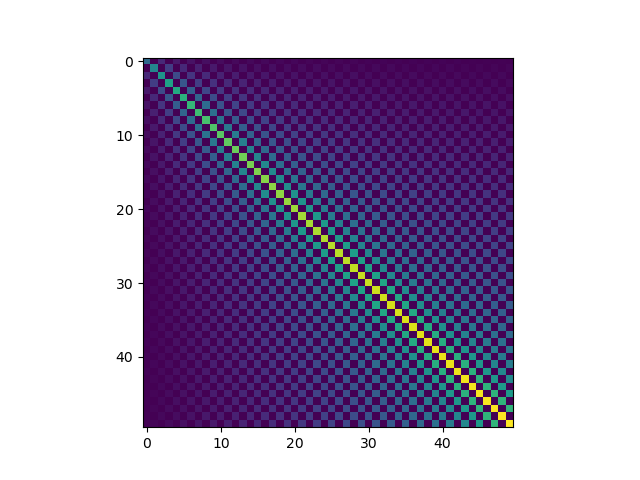

In [21]:
plt.figure()
plt.imshow(Phi_sin[:50,:50])

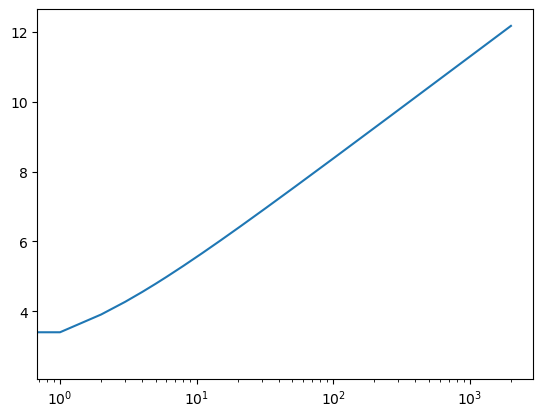

In [97]:
plt.plot(Phi_sin.diagonal())
plt.xscale('log')

In [98]:
np.save('Phi_sin.npy', Phi_sin)

In [99]:
Phi_sin.shape

(1999, 1999)

In [101]:
Phi_zrho_km.shape

(2000, 1999)

In [111]:
Phi_sin = Phi_sin.reshape((Phi_sin.shape[0],Phi_sin.shape[0]))

In [105]:
N_index = np.arange(40).reshape(1,1,-1)

In [106]:
N_index

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
         16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
         32, 33, 34, 35, 36, 37, 38, 39]]])

In [107]:
K_index

array([[   1],
       [   2],
       [   3],
       ...,
       [1997],
       [1998],
       [1999]])

In [27]:
Phi_sin_km_n = np.zeros((300,300,900))

In [28]:
for n in range(Phi_sin_km_n.shape[2]):
    Phi_sin_km_n[:,:,n]=Phi_sin[:Phi_sin_km_n.shape[0],n:n+Phi_sin_km_n.shape[0]]
    if n>0:
        if n< Phi_sin_km_n.shape[0]:
            Phi_sin_km_n[:,:n-1,n]-=Phi_sin[:Phi_sin_km_n.shape[0],:n-1][:,::-1]
            Phi_sin_km_n[:,n:,n]+=Phi_sin[:Phi_sin_km_n.shape[0],:Phi_sin_km_n.shape[0]-n]
        elif n> Phi_sin_km_n.shape[0]:
            Phi_sin_km_n[:,:,n]-=Phi_sin[:Phi_sin_km_n.shape[0],n-Phi_sin_km_n.shape[0]-1:n-1][:,::-1]
        elif n == Phi_sin_km_n.shape[0]:
            Phi_sin_km_n[:,:-1,n]-=Phi_sin[:Phi_sin_km_n.shape[0],:n-1][:,::-1]

In [26]:
Phi_sin_km_n[:,:,4]

array([[-0.33953055,  0.        , -2.18269636,  0.        ],
       [ 0.        , -2.52222691,  0.        ,  0.64672485],
       [-2.18269636,  0.        ,  0.3071943 ,  0.        ],
       [ 0.        ,  0.64672485,  0.        ,  1.38751877]])

In [30]:
Phi_sin_km_n[:5,:5,1]

array([[0.        , 3.39530545, 0.        , 1.35812218, 0.        ],
       [3.39530545, 0.        , 4.75342763, 0.        , 2.23120073],
       [0.        , 4.75342763, 0.        , 5.62650618, 0.        ],
       [1.35812218, 0.        , 5.62650618, 0.        , 6.27323103],
       [0.        , 2.23120073, 0.        , 6.27323103, 0.        ]])

In [31]:
Phi_sin_km_n[:5,:5,20]

array([[-0.01276431,  0.        , -0.03907641,  0.        , -0.06790611],
       [ 0.        , -0.05184071,  0.        , -0.10698251,  0.        ],
       [-0.03907641,  0.        , -0.11974682,  0.        , -0.20855148],
       [ 0.        , -0.10698251,  0.        , -0.22131579,  0.        ],
       [-0.06790611,  0.        , -0.20855148,  0.        , -0.36500426]])

In [29]:
np.save('Phi_sin_rhorhoz_km_n.npy', Phi_sin_km_n)

In [8]:
S = Phi_zzrho[:200,:200,0]

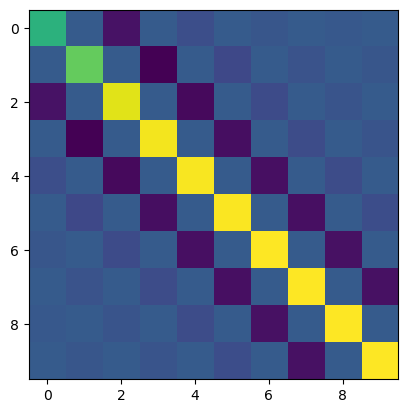

In [9]:
plt.figure()
plt.imshow(S[:10,:10])

<IPython.core.display.Javascript object>


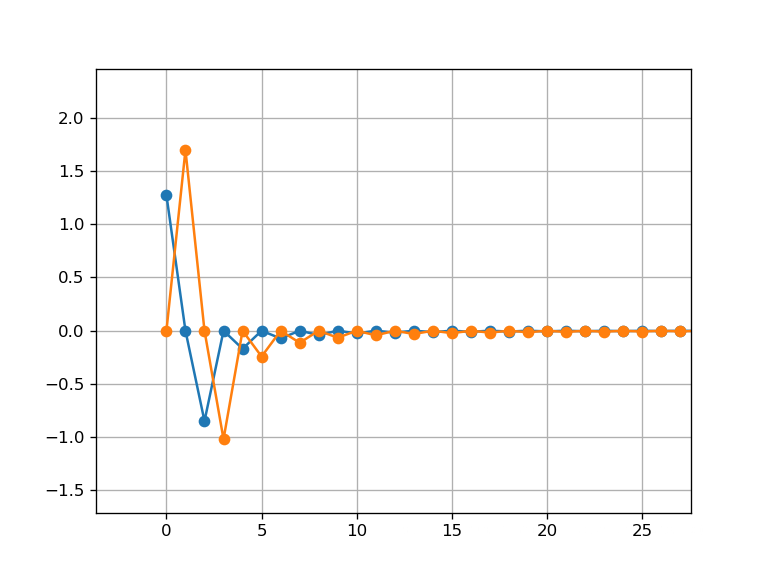

In [16]:
%matplotlib notebook
plt.figure()
Proj = Phi_zzrho[:200,0,0]
plt.plot(Proj,'o-')

Proj = Phi_zzrho[:200,1,0]
plt.plot(Proj,'o-')
plt.grid()

In [18]:
from scipy.linalg import solve

In [20]:
Res = solve(S, S)

<IPython.core.display.Javascript object>


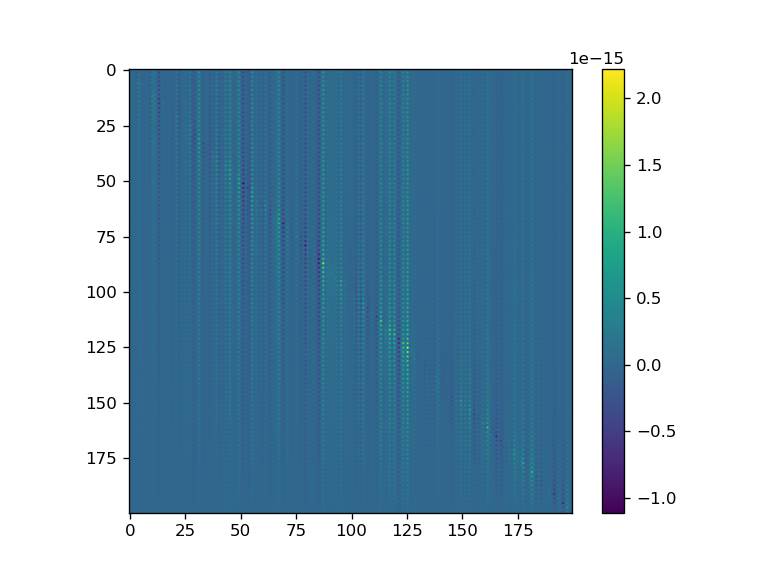

In [24]:
plt.figure()
plt.imshow(Res-np.eye(Res.shape[0]))
plt.colorbar()

In [27]:
Res = solve(S[:50,:50], S[:50,50:])

<IPython.core.display.Javascript object>


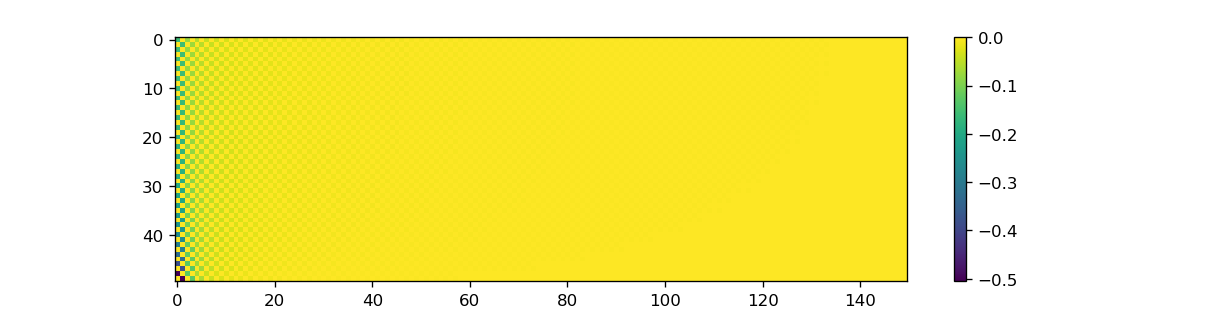

In [28]:
plt.figure()
plt.imshow(Res)
plt.colorbar()